In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import astropy
from astropy import constants as const
import extinction
import sncosmo
from astropy.table import Table
from IPython.display import display

In [ ]:
'''load in file with wavelength separations'''
df = pd.read_csv('./d_lambda.txt', comment='#', sep = '\s+')

In [ ]:
'''define the six SPHEREx bands using specific wavelengths separated 
    by distances as given in the SPHEREx documentation from file above'''
wl1 = [] #angstrom, first wavelength value of SPHEREx band 1
wl2 = []
wl3 = []
wl4mod = [] #modified to fit SNCosmo SALT3 NIR spectral bounds
wl4 = []
wl5 = []
wl6 = []

for i in range(len(df['lambda'])):
    new_wl = (df['lambda'][i]*10000) #convert to angstroms, sncosmo pref.
    #print(new_wl)
    if new_wl <= 11200:
        wl1.append(new_wl)
    if (new_wl >= 11000) & (new_wl <= 16500):
        wl2.append(new_wl)
    if (new_wl >= 16300) & (new_wl <= 24400):
        wl3.append(new_wl)
    if (new_wl >= 24000) & (new_wl <= 33897.8):
        wl4mod.append(new_wl)
    if (new_wl >= 24000) & (new_wl <= 38500):
        wl4.append(new_wl)
    if (new_wl >= 38100) & (new_wl <= 44300):
        wl5.append(new_wl)
    if (new_wl >= 44100) & (new_wl <= 50100):
        wl6.append(new_wl)

In [ ]:
'''further explaned in documentation, but transmission should be 
    irrelevant, set to 1 for all cases'''
T_len12 = np.ones(12) #for wavelength arrays w 14 entries
T_len16 = np.ones(16) #for wavelength arrays w 16 entries
T_len17 = np.ones(17) #for wavelength arrays w 17 entries

In [ ]:
'''make sncosmo Bandpasses'''
band1 = sncosmo.Bandpass(wl1, T_len16)
sncosmo.register(band1, 'band1', force=True)

band2 = sncosmo.Bandpass(wl2, T_len16, name='band2')
sncosmo.register(band2, 'band2', force=True)

band3 = sncosmo.Bandpass(wl3, T_len17, name='band3')
sncosmo.register(band3, 'band3', force=True)

band4mod = sncosmo.Bandpass(wl4mod, T_len12, name='band4mod')
sncosmo.register(band4mod, 'band4mod', force=True)

band4 = sncosmo.Bandpass(wl4, T_len17, name='band4')
sncosmo.register(band4, 'band4', force=True)

band5 = sncosmo.Bandpass(wl5, T_len16, name='band5')
sncosmo.register(band5, 'band5', force=True)

band6 = sncosmo.Bandpass(wl6, T_len17, name='band6')
sncosmo.register(band6, 'band6', force=True);

In [ ]:
'''Now we simulate some SNe'''

In [ ]:
'''load in file with SN params'''
FITRES = pd.read_csv('./FITOPT000.FITRES', sep = '\s+', comment = '#')

In [ ]:
'''SN 98342'''
model = sncosmo.Model('salt3-nir')
'''the SALT3 model runs on 5 params: z, t0, x0, x1, and c which we can 
    set based on the SN of interest'''
for i in range(len(FITRES.CID)):
    if FITRES.CID[i] == 98342:
        model.parameters[0] = FITRES.zHD[i]
        model.parameters[1] = FITRES.PKMJD[i]
        model.parameters[2] = FITRES.x0[i]
        model.parameters[3] = FITRES.x1[i]
        model.parameters[4] = FITRES.c[i]
        params = {'z': FITRES.zHD[i], 't0': FITRES.PKMJD[i], 'x0': FITRES.x0[i], 'x1': FITRES.x1[i], 'c': FITRES.c[i]}

In [ ]:
'''load in file with observables'''
LCPLOT = pd.read_csv('./LSSTDDF_EUCLID.LCPLOT.TEXT', sep = ', ', comment = '#')

In [ ]:
'''based on magnitude similarity, 
    I use noise and time from LSST or Euclid:
    band1 = LSST y, band2 = Euclid J, band3-band6 = Euclid H'''
times = []
skynoise = []

for i in range(len(LCPLOT.CID)):
    if (LCPLOT.CID[i] == 98342) & (LCPLOT.BAND[i] == 'y') & (LCPLOT.MJD[i] == 62176.961):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
    if (LCPLOT.CID[i] == 98342) & (LCPLOT.BAND[i] == 'J') & (LCPLOT.MJD[i] == 62176.961):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
    if (LCPLOT.CID[i] == 98342) & (LCPLOT.BAND[i] == 'H') & (LCPLOT.MJD[i] == 62176.961):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
    if (LCPLOT.CID[i] == 98342) & (LCPLOT.BAND[i] == 'H') & (LCPLOT.MJD[i] == 62176.961):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
    if (LCPLOT.CID[i] == 98342) & (LCPLOT.BAND[i] == 'H') & (LCPLOT.MJD[i] == 62176.961):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
    if (LCPLOT.CID[i] == 98342) & (LCPLOT.BAND[i] == 'H') & (LCPLOT.MJD[i] == 62176.961):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])'''

obs = Table({'time': times,
             'band': ['band1', 'band2', 'band3', 'band4'],
             'gain': [1., 1., 1., 1.],
             'skynoise': skynoise,
             'zp': [21., 21., 21., 21.], 
             'zpsys': ['ab', 'ab', 'ab', 'ab']})
                    
lcs = sncosmo.realize_lcs(obs, model, [params])

In [ ]:
model.parameters[1]

In [ ]:
times = []
band = []
skynoise = []
zpsys = []

for i in range(len(LCPLOT.CID)):
    if (LCPLOT.CID[i] == 98342) & (LCPLOT.BAND[i] == 'y'):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('band1')
        zpsys.append('ab')
    if (LCPLOT.CID[i] == 98342) & (LCPLOT.BAND[i] == 'J'):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('band2')
        zpsys.append('ab')
    if (LCPLOT.CID[i] == 98342) & (LCPLOT.BAND[i] == 'H'):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('band3')
        zpsys.append('ab')
    if (LCPLOT.CID[i] == 98342) & (LCPLOT.BAND[i] == 'H'):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('band4mod')
        zpsys.append('ab')
    '''if (LCPLOT.CID[i] == 98342) & (LCPLOT.BAND[i] == 'H'):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('band5')
        zpsys.append('ab')
    if (LCPLOT.CID[i] == 98342) & (LCPLOT.BAND[i] == 'H'):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('band6')
        zpsys.append('ab')'''

gain = np.ones(len(times))
zp = 21.*np.ones(len(times))

obs = Table({'time': times,
             'band': band,
             'gain': gain,
             'skynoise': skynoise,
             'zp': zp, 
             'zpsys': zpsys})
                    
lcs = sncosmo.realize_lcs(obs, model, [params])
print(lcs[0])

In [ ]:
result, fitted_model = sncosmo.fit_lc(lcs[0], model, ['z', 't0', 'x0', 'x1', 'c'], bounds={'z':(0.3, 0.7)})  # bounds on parameters (if any)

### LSST

In [2]:
'''load in file with SN params'''
FITRES = pd.read_csv('./FITOPT000.FITRES', sep = '\s+', comment = '#')
'''load in file with observables'''
LCPLOT = pd.read_csv('./LSSTDDF_EUCLID.LCPLOT.TEXT', sep = ', ', comment = '#')

C:\Users\avacb\AppData\Local\Temp\ipykernel_27320\3821894852.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  LCPLOT = pd.read_csv('./LSSTDDF_EUCLID.LCPLOT.TEXT', sep = ', ', comment = '#')


In [26]:
'''SN 22047'''
model = sncosmo.Model('salt2-extended')
'''the SALT2 model runs on 5 params: z, t0, x0, x1, and c which we can 
    set based on the SN of interest'''
zp_vals = []

for i in range(len(FITRES.CID)):
    if FITRES.CID[i] == 22047:
        z = FITRES.zHD[i]
        t0 = FITRES.PKMJD[i]
        x0 = FITRES.x0[i]
        x1 = FITRES.x1[i]
        c = FITRES.c[i]
        zp_vals.append(FITRES.HOST_SBMAG_u[i])
        zp_vals.append(FITRES.HOST_SBMAG_g[i])
        zp_vals.append(FITRES.HOST_SBMAG_r[i])
        zp_vals.append(FITRES.HOST_SBMAG_i[i])
        zp_vals.append(FITRES.HOST_SBMAG_z[i])
        zp_vals.append(FITRES.HOST_SBMAG_y[i])
params = {'z': z, 't0': t0, 'x0': x0, 'x1': x1, 'c': c}

In [18]:
CID = 22047

times = []
band = []
skynoise = []
zp = []
zpsys = []

for i in range(len(LCPLOT.CID)):
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'g') & (LCPLOT.DATAFLAG[i] == 0):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lsstg')
        zp.append(zp_vals[1])
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'r') & (LCPLOT.DATAFLAG[i] == 0):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lsstr')
        zp.append(zp_vals[2])
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'i') & (LCPLOT.DATAFLAG[i] == 0):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lssti')
        zp.append(zp_vals[3])
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'z') & (LCPLOT.DATAFLAG[i] == 0):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lsstz')
        zp.append(zp_vals[4])
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'y') & (LCPLOT.DATAFLAG[i] == 0):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lssty')
        zp.append(zp_vals[5])
        zpsys.append('ab')

gain = np.ones(len(times))*1.53

obs = Table({'time': times,
             'band': band,
             'gain': gain,
             'skynoise': skynoise,
             'zp': zp, 
             'zpsys': zpsys})
                    
lcs = sncosmo.realize_lcs(obs, model, [params])
print(lcs[0])

   time    band         flux         fluxerr    zp    zpsys
--------- ----- -------------------- ------- -------- -----
60202.223 lsstg                  0.0     0.0 26.02534    ab
60204.223 lsstg                  0.0     0.0 26.02534    ab
60206.223 lsstg                  0.0     0.0 26.02534    ab
60208.223 lsstg                  0.0     0.0 26.02534    ab
60210.223 lsstg                  0.0     0.0 26.02534    ab
60212.223 lsstg                  0.0     0.0 26.02534    ab
60214.223 lsstg                  0.0     0.0 26.02534    ab
60216.223 lsstg                  0.0     0.0 26.02534    ab
60218.223 lsstg                  0.0     0.0 26.02534    ab
60220.223 lsstg                  0.0     0.0 26.02534    ab
      ...   ...                  ...     ...      ...   ...
60380.223 lssty  -1.4703218711907922  2.1688     27.5    ab
60382.223 lssty   2.1306135066031198  2.1118     27.5    ab
60384.223 lssty   3.0313301929843406  2.0563     27.5    ab
60386.223 lssty  -2.2490420588579494  2.

In [23]:
CID = 22047

times = []
band = []
skynoise = []
zp = []
zpsys = []

for i in range(len(LCPLOT.CID)):
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'g') & (LCPLOT.DATAFLAG[i] == 0) & (LCPLOT.FLUXCAL_ERR[i] != 0) & (LCPLOT.FLUXCAL[i]/LCPLOT.FLUXCAL_ERR[i] > 5):
        skynoise.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lsstg')
        zp.append(zp_vals[1])
        zpsys.append('ab')
        
gain = np.ones(len(times))*1.53

obs = Table({'time': times,
             'band': band,
             'gain': gain,
             'skynoise': skynoise,
             'zp': zp, 
             'zpsys': zpsys})
                    
lcs = sncosmo.realize_lcs(obs, model, [params])
print(lcs[0])

C:\Users\avacb\AppData\Local\Temp\ipykernel_22636\1182189162.py:10: RuntimeWarning: invalid value encountered in scalar divide
  if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'g') & (LCPLOT.DATAFLAG[i] == 0) & (LCPLOT.FLUXCAL_ERR[i] != 0) & (LCPLOT.FLUXCAL[i]/LCPLOT.FLUXCAL_ERR[i] > 5):


   time    band         flux         fluxerr    zp    zpsys
--------- ----- -------------------- ------- -------- -----
60250.223 lsstg   -1.706163527791385  2.4011 26.02534    ab
60252.223 lsstg   -2.215459568478286  2.6989 26.02534    ab
60254.223 lsstg    -3.42103959105034  2.7897 26.02534    ab
60256.223 lsstg   -4.037065386058223  2.8092 26.02534    ab
60258.223 lsstg  -0.9239529876540419   2.964 26.02534    ab
60260.223 lsstg   0.7703906344754172   2.687 26.02534    ab
60262.223 lsstg -0.26912603806714497  2.3718 26.02534    ab
60264.223 lsstg   1.0556096173997052  2.3438 26.02534    ab
60266.223 lsstg   -2.671538369335612  2.2798 26.02534    ab
60268.223 lsstg    4.526567753809556  2.2194 26.02534    ab
60270.223 lsstg -0.24419704028029712  1.5812 26.02534    ab
60272.223 lsstg   2.4737541682820248  1.6143 26.02534    ab


In [13]:
result, fitted_model = sncosmo.fit_lc(
    lcs[0], model,
    ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
    bounds={'z':(0, 1)})  # bounds on parameters (if any)

C:\Users\avacb\anaconda3\lib\site-packages\sncosmo\fitting.py:235: RuntimeWarning: invalid value encountered in divide
  significant_data = data[(data.flux / data.fluxerr) > minsnr]


DataQualityError: No data points with S/N > 5.0. Initial guessing failed.

In [68]:
'''need to convert flux and flux error to correct SNCosmo units'''
CID = 22047
#fluxerr_vals = []
skynoise_vals = []

for i in range(len(LCPLOT.CID)):
    if (LCPLOT.CID[i] == CID) & (LCPLOT.DATAFLAG[i] == 0):
        print(LCPLOT.BAND[i])
        
        flux_val = LCPLOT.FLUXCAL[i]
        source_sq = flux_val/(2.3**2)
        
        fluxerr = LCPLOT.FLUXCAL_ERR[i]
        fluxerr_sq = fluxerr**2
        
        print(flux_val)
        
        skynoise_sq = fluxerr_sq - source_sq
        print(skynoise_sq)
        skynoise_val = np.abs(skynoise_sq)**0.5
        skynoise_vals.append(skynoise_val)
        print(skynoise_val)

g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.0
0.0
0.0
g
0.00065281
-0.0001229783759659038
0.011089561576811943
g
0.1369
-0.0071428826132325166
0.08451557615749014
g
0.52378
0.12608956998582227
0.3550909319960484
g
1.2081
0.42515243698468796
0.6520371438688811
g
2.2348
0.7439425330812854
0.862521033413844
g
3.6556
2.405504392457467
1.5509688560565835
g
5.5138
2.8963309218147444
1.7018610171852295
g
7.8561
3.0050759338374293
1.7335154841643121
g
10.735
2.7388083928922504
1.6549345584923443
g
14.203
3.0804040833459356
1.755107997630327
g
17.8
3.919221890529301
1.979702475254628
g
20.247
3.9550158820604904
1.9887221731706242
g
20.627
3.992360783667297
1.9980892832071586
g
19.76
5.049946283553875
2.2472085536402435
g
18.646
3.6952052948960286
1.9222916778928292
g
17.437
2.329215958336483
1.5261769092528177
g
15.787
2.509088421096407
1.58

In [85]:
CID = 87584

times = []
band = []
zp = []
zpsys = []

for i in range(len(LCPLOT.CID)):
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'g') & (LCPLOT.DATAFLAG[i] == 0):
        times.append(LCPLOT.MJD[i])
        band.append('lsstg')
        zp.append(30)
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'r') & (LCPLOT.DATAFLAG[i] == 0):
        times.append(LCPLOT.MJD[i])
        band.append('lsstr')
        zp.append(30)
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'i') & (LCPLOT.DATAFLAG[i] == 0):
        times.append(LCPLOT.MJD[i])
        band.append('lssti')
        zp.append(30)
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'z') & (LCPLOT.DATAFLAG[i] == 0):
        times.append(LCPLOT.MJD[i])
        band.append('lsstz')
        zp.append(30)
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'y') & (LCPLOT.DATAFLAG[i] == 0):
        times.append(LCPLOT.MJD[i])
        band.append('lssty')
        zp.append(30)
        zpsys.append('ab')
        
gain = np.ones(len(times))

obs = Table({'time': times,
             'band': band,
             'gain': gain,
             'skynoise': skynoise_vals,
             'zp': zp, 
             'zpsys': zpsys})
                    
lcs = sncosmo.realize_lcs(obs, model, [params])
print(lcs[0])
print(lcs)
print(len(lcs[0]))

   time    band         flux             fluxerr        zp zpsys
--------- ----- ------------------- ------------------ --- -----
62072.184 lsstg                 0.0                0.0  30    ab
62074.184 lsstg                 0.0                0.0  30    ab
62076.184 lsstg                 0.0                0.0  30    ab
62078.184 lsstg                 0.0                0.0  30    ab
62080.184 lsstg                 0.0                0.0  30    ab
62082.184 lsstg                 0.0                0.0  30    ab
62084.184 lsstg                 0.0                0.0  30    ab
62086.184 lsstg                 0.0                0.0  30    ab
62088.184 lsstg                 0.0                0.0  30    ab
62090.184 lsstg                 0.0                0.0  30    ab
      ...   ...                 ...                ... ...   ...
62250.184 lssty     9417383619832.2  39766256379625.06  30    ab
62252.184 lssty -20679725119718.992   38312721755921.9  30    ab
62254.184 lssty -11375306

In [86]:
result, fitted_model = sncosmo.fit_lc(
    lcs[0], model,
    ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
    bounds={'z':(0, 1)})  # bounds on parameters (if any)

C:\Users\avacb\anaconda3\lib\site-packages\sncosmo\fitting.py:235: RuntimeWarning: invalid value encountered in divide
  significant_data = data[(data.flux / data.fluxerr) > minsnr]


DataQualityError: No data points with S/N > 5.0. Initial guessing failed.

In [84]:
'''need to put all fluxes in photons and Hz'''
CID = 87584
skynoise_vals = []

for i in range(len(LCPLOT.CID)):
    if (LCPLOT.CID[i] == CID) & (LCPLOT.DATAFLAG[i] == 0) & (LCPLOT.BAND[i] == 'g'):
        wl = 4.76e-5 #centimeters
        planck = (6.62607004e-34)*(1e7) #erg-sec
        c = 3e10 #cm/s
        Ephot = planck*c/wl
        
        flux_1 = LCPLOT.FLUXCAL[i]*(1e10)/Ephot
        flux_2 = flux_1/(3e8) #flux in photons/s/cm^2/Hz
        print('Flux: '+str(flux_2))
        
        source_sq = flux_2 #source noise
        
        instrumental_noise = 12.7         
        
        fluxerr_1 = LCPLOT.FLUXCAL_ERR[i]*(1e10)/Ephot
        fluxerr_2 = fluxerr_1/(3e8) #flux err in photons/s/cm^2/Hz
        
        skynoise_val_sq = fluxerr_2**2 - source_sq - instrumental_noise**2
        
        if (skynoise_val_sq < 0):
            skynoise_vals.append(0)
            print('Sky noise: ' + str(0))
        
        else:
            skynoise_val = skynoise_val_sq**0.5
            skynoise_vals.append(skynoise_val)
            print('Sky noise: ' + str(skynoise_val))
    
    if (LCPLOT.CID[i] == CID) & (LCPLOT.DATAFLAG[i] == 0) & (LCPLOT.BAND[i] == 'r'):
        wl = 6.22e-5 #centimeters
        planck = (6.62607004e-34)*(1e7) #erg-sec
        c = 3e10 #cm/s
        Ephot = planck*c/wl
        
        flux_1 = LCPLOT.FLUXCAL[i]*(1e10)/Ephot
        flux_2 = flux_1/(3e8) #flux in photons/s/cm^2/Hz
        print('Flux: '+str(flux_2))
        
        source_sq = flux_2 #source noise
        
        instrumental_noise = 12.7         
        
        fluxerr_1 = LCPLOT.FLUXCAL_ERR[i]*(1e10)/Ephot
        fluxerr_2 = fluxerr_1/(3e8) #flux err in photons/s/cm^2/Hz
        
        skynoise_val_sq = fluxerr_2**2 - source_sq - instrumental_noise**2
        
        if (skynoise_val_sq < 0):
            skynoise_vals.append(0)
            print('Sky noise: ' + str(0))
        
        else:
            skynoise_val = skynoise_val_sq**0.5
            skynoise_vals.append(skynoise_val)
            print('Sky noise: ' + str(skynoise_val))
    
    if (LCPLOT.CID[i] == CID) & (LCPLOT.DATAFLAG[i] == 0) & (LCPLOT.BAND[i] == 'i'):
        wl = 7.55e-5 #centimeters
        planck = (6.62607004e-34)*(1e7) #erg-sec
        c = 3e10 #cm/s
        Ephot = planck*c/wl
        
        flux_1 = LCPLOT.FLUXCAL[i]*(1e10)/Ephot
        flux_2 = flux_1/(3e8) #flux in photons/s/cm^2/Hz
        
        source_sq = flux_2 #source noise
        
        instrumental_noise = 12.7         
        
        fluxerr_1 = LCPLOT.FLUXCAL_ERR[i]*(1e10)/Ephot
        fluxerr_2 = fluxerr_1/(3e8) #flux err in photons/s/cm^2/Hz
        
        skynoise_val_sq = fluxerr_2**2 - source_sq - instrumental_noise**2
        
        if (skynoise_val_sq < 0):
            skynoise_vals.append(0)
            print('Sky noise: ' + str(0))
        
        else:
            skynoise_val = skynoise_val_sq**0.5
            skynoise_vals.append(skynoise_val)
            print('Sky noise: ' + str(skynoise_val))
        
    if (LCPLOT.CID[i] == CID) & (LCPLOT.DATAFLAG[i] == 0) & (LCPLOT.BAND[i] == 'z'):
        wl = 8.7e-5 #centimeters
        planck = (6.62607004e-34)*(1e7) #erg-sec
        c = 3e10 #cm/s
        Ephot = planck*c/wl
        
        flux_1 = LCPLOT.FLUXCAL[i]*(1e10)/Ephot
        flux_2 = flux_1/(3e8) #flux in photons/s/cm^2/Hz
        
        source_sq = flux_2 #source noise
        
        instrumental_noise = 12.7         
        
        fluxerr_1 = LCPLOT.FLUXCAL_ERR[i]*(1e10)/Ephot
        fluxerr_2 = fluxerr_1/(3e8) #flux err in photons/s/cm^2/Hz
        
        skynoise_val_sq = fluxerr_2**2 - source_sq - instrumental_noise**2
        
        if (skynoise_val_sq < 0):
            skynoise_vals.append(0)
            print('Sky noise: ' + str(0))
        
        else:
            skynoise_val = skynoise_val_sq**0.5
            skynoise_vals.append(skynoise_val)
            print('Sky noise: ' + str(skynoise_val))
        
    if (LCPLOT.CID[i] == CID) & (LCPLOT.DATAFLAG[i] == 0) & (LCPLOT.BAND[i] == 'y'):
        wl = 10.15e-5 #centimeters
        planck = (6.62607004e-34)*(1e7) #erg-sec
        c = 3e10 #cm/s
        Ephot = planck*c/wl
        
        flux_1 = LCPLOT.FLUXCAL[i]*(1e10)/Ephot
        flux_2 = flux_1/(3e8) #flux in photons/s/cm^2/Hz
        print(flux_2)
        
        source_sq = flux_2 #source noise
        
        instrumental_noise = 12.7         
        
        fluxerr_1 = LCPLOT.FLUXCAL_ERR[i]*(1e10)/Ephot
        fluxerr_2 = fluxerr_1/(3e8) #flux err in photons/s/cm^2/Hz
        
        skynoise_val_sq = fluxerr_2**2 - source_sq - instrumental_noise**2
        
        if (skynoise_val_sq < 0):
            skynoise_vals.append(0)
            print('Sky noise: ' + str(0))
        
        else:
            skynoise_val = skynoise_val_sq**0.5
            skynoise_vals.append(skynoise_val)
            print('Sky noise: ' + str(skynoise_val))

Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 0.0
Sky noise: 0
Flux: 285043034515.08813
Sky noise: 285043034514.58813
Flux: 3783359411100.4067
Sky noise: 3668978220861.555
Flux: 11913044412471.48
Sky noise: 8258912598715.687
Flux: 25495910527515.18
Sky noise: 11736643553833.463
Flux: 45521798049424.52
Sky noise: 14879133058147.941
Flux: 72874307659245.12
Sky noise: 23751856789406.43
Flux: 108362808002487.64
Sky noise: 25957266619332.75
Flux: 152965884837925.25
Sky noise: 27213623865913.617
Flux: 207594277440240.03
Sky noise: 27845793458855.91
Flux: 273317565676280.34
Sky noise: 31358644946914.703
Flux: 338346425192799.7
Sky noise: 35187581231445.29
Flux: 378527507653356.75
Sky noise: 36174148929522.91
Flux: 3

0.0
Sky noise: 0
0.0
Sky noise: 0
0.0
Sky noise: 0
0.0
Sky noise: 0
0.0
Sky noise: 0
0.0
Sky noise: 0
0.0
Sky noise: 0
0.0
Sky noise: 0
0.0
Sky noise: 0
0.0
Sky noise: 0
0.0
Sky noise: 0
0.0
Sky noise: 0
0.0
Sky noise: 0
0.0
Sky noise: 0
0.0
Sky noise: 0
2385056285942.9116
Sky noise: 2385056285942.4116
26338932437712.527
Sky noise: 22017475283634.246
74685127972008.11
Sky noise: 35312040793874.34
145375588775595.47
Sky noise: 41030865542869.68
236071724013617.28
Sky noise: 44276638994159.125
344967678609084.0
Sky noise: 60956544512064.14
470032929369866.94
Sky noise: 62874733646622.33
608918673274057.1
Sky noise: 64141044841041.87
759820757275840.0
Sky noise: 65014186833967.85
921054170511672.5
Sky noise: 61761605257974.734
1073743387247516.8
Sky noise: 61075686694328.93
1183592479301149.8
Sky noise: 61896065720821.05
1229904747580966.0
Sky noise: 62462842102194.48
1249631288902651.8
Sky noise: 63715537047212.71
1278191372024126.0
Sky noise: 64151257028088.445
1308913034738227.0
Sky no

### Light Curve Fitting

In [11]:
zp_vals = []

for i in range(len(FITRES.CID)):
    if FITRES.CID[i] == 22047:
        zp_vals.append(FITRES.HOST_SBMAG_u[i])
        zp_vals.append(FITRES.HOST_SBMAG_g[i])
        zp_vals.append(FITRES.HOST_SBMAG_r[i])
        zp_vals.append(FITRES.HOST_SBMAG_i[i])
        zp_vals.append(FITRES.HOST_SBMAG_z[i])
        zp_vals.append(FITRES.HOST_SBMAG_y[i])
print(zp_vals)

[27.5, 26.02534, 24.95481, 24.06804, 23.59546, 27.5]


In [12]:
CID = 87584

times = []
band = []
flux = []
fluxerr = []
zp = []
zpsys = []

for i in range(len(LCPLOT.CID)):
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'g') & (LCPLOT.DATAFLAG[i] == 0):
        flux.append(LCPLOT.FLUXCAL[i])
        fluxerr.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lsstg')
        zp.append(zp_vals[1])
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'r') & (LCPLOT.DATAFLAG[i] == 0):
        flux.append(LCPLOT.FLUXCAL[i])
        fluxerr.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lsstr')
        zp.append(zp_vals[2])
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'i') & (LCPLOT.DATAFLAG[i] == 0):
        flux.append(LCPLOT.FLUXCAL[i])
        fluxerr.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lssti')
        zp.append(zp_vals[3])
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'z') & (LCPLOT.DATAFLAG[i] == 0):
        flux.append(LCPLOT.FLUXCAL[i])
        fluxerr.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lsstz')
        zp.append(zp_vals[4])
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'y') & (LCPLOT.DATAFLAG[i] == 0):
        flux.append(LCPLOT.FLUXCAL[i])
        fluxerr.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lssty')
        zp.append(zp_vals[5])
        zpsys.append('ab')

data = Table({'time': times,
             'band': band,
             'flux': flux,
             'fluxerr': fluxerr,
             'zp': zp, 
             'zpsys': zpsys})

print(data)

   time    band  flux  fluxerr    zp    zpsys
--------- ----- ------ ------- -------- -----
62072.184 lsstg    0.0     0.0 26.02534    ab
62074.184 lsstg    0.0     0.0 26.02534    ab
62076.184 lsstg    0.0     0.0 26.02534    ab
62078.184 lsstg    0.0     0.0 26.02534    ab
62080.184 lsstg    0.0     0.0 26.02534    ab
62082.184 lsstg    0.0     0.0 26.02534    ab
62084.184 lsstg    0.0     0.0 26.02534    ab
62086.184 lsstg    0.0     0.0 26.02534    ab
62088.184 lsstg    0.0     0.0 26.02534    ab
62090.184 lsstg    0.0     0.0 26.02534    ab
      ...   ...    ...     ...      ...   ...
62250.184 lssty 5.3022  2.3364     27.5    ab
62252.184 lssty 5.1085   2.251     27.5    ab
62254.184 lssty 4.9219  2.1688     27.5    ab
62256.184 lssty 4.7421  2.0895     27.5    ab
62258.184 lssty 4.5689  2.0132     27.5    ab
62260.184 lssty  4.402  1.9397     27.5    ab
62262.184 lssty 4.2412  1.8688     27.5    ab
62264.184 lssty 4.0862  1.8005     27.5    ab
62266.184 lssty  3.937  1.7348    

In [15]:
# create a model
model = sncosmo.Model(source='salt2-extended')

# run the fit
result, fitted_model = sncosmo.fit_lc(
    data, model,
    ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
    bounds={'z':(0, 1)})  # bounds on parameters (if any)

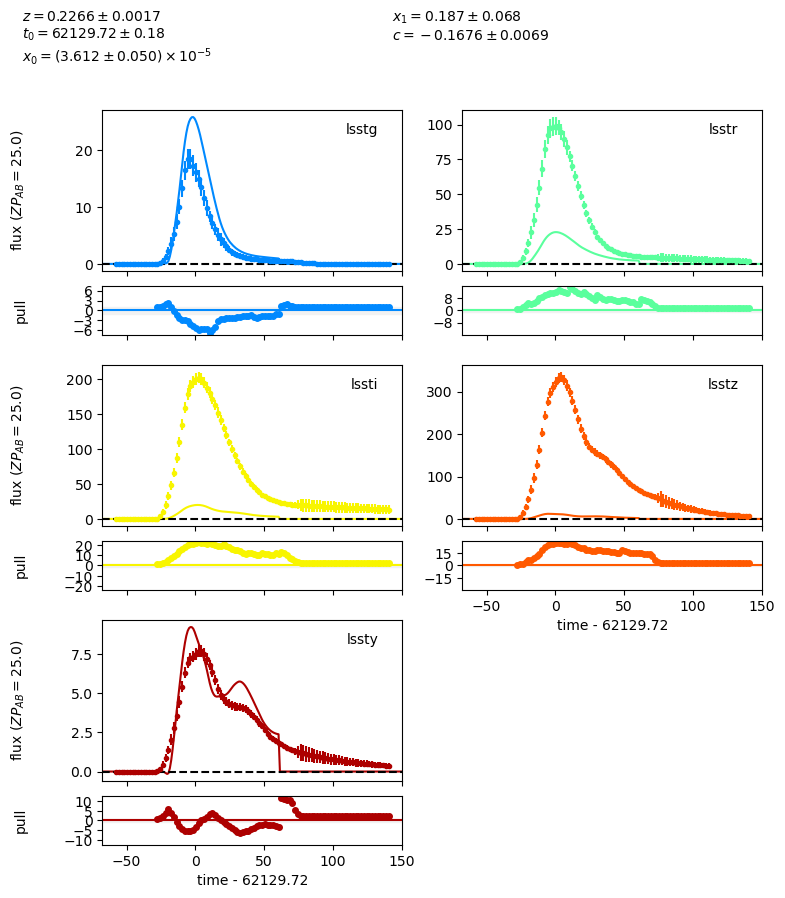

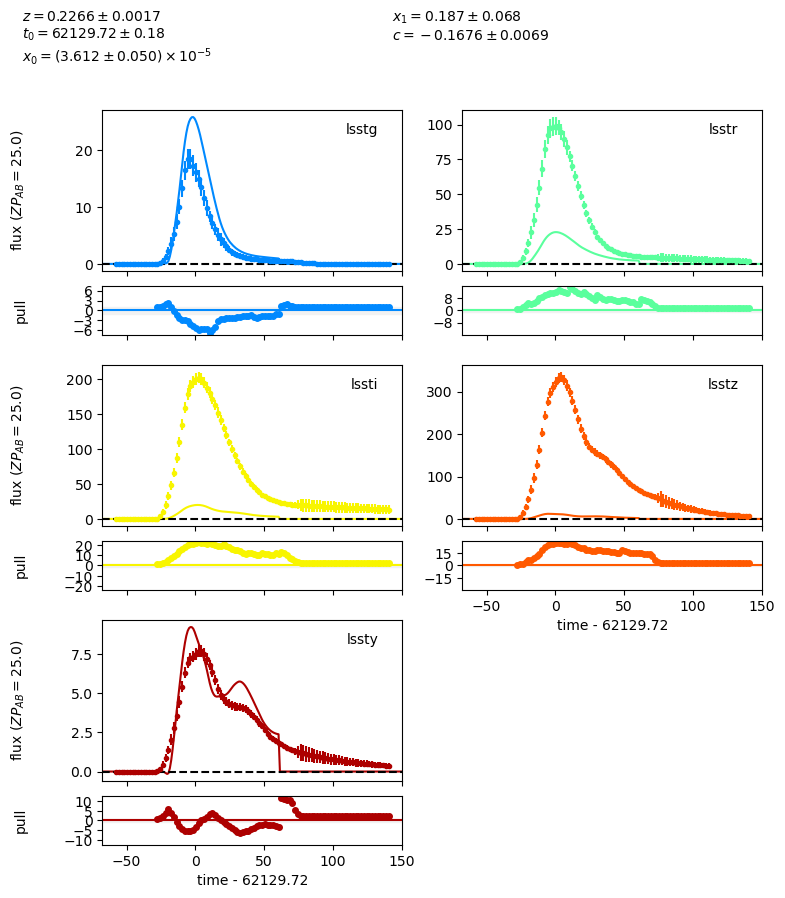

In [16]:
sncosmo.plot_lc(data, model=fitted_model, errors=result.errors)

In [17]:
CID = 87584

times = []
band = []
flux = []
fluxerr = []
zp = []
zpsys = []

for i in range(len(LCPLOT.CID)):
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'g'):
        flux.append(LCPLOT.FLUXCAL[i])
        fluxerr.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lsstg')
        zp.append(zp_vals[1])
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'r'):
        flux.append(LCPLOT.FLUXCAL[i])
        fluxerr.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lsstr')
        zp.append(zp_vals[2])
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'i'):
        flux.append(LCPLOT.FLUXCAL[i])
        fluxerr.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lssti')
        zp.append(zp_vals[3])
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'z'):
        flux.append(LCPLOT.FLUXCAL[i])
        fluxerr.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lsstz')
        zp.append(zp_vals[4])
        zpsys.append('ab')
    if (LCPLOT.CID[i] == CID) & (LCPLOT.BAND[i] == 'y'):
        flux.append(LCPLOT.FLUXCAL[i])
        fluxerr.append(LCPLOT.FLUXCAL_ERR[i])
        times.append(LCPLOT.MJD[i])
        band.append('lssty')
        zp.append(zp_vals[5])
        zpsys.append('ab')

data = Table({'time': times,
             'band': band,
             'flux': flux,
             'fluxerr': fluxerr,
             'zp': zp, 
             'zpsys': zpsys})

print(data)

   time    band    flux   fluxerr    zp    zpsys
--------- ----- --------- ------- -------- -----
62112.121 lsstg    9.9901  1.0352 26.02534    ab
62116.211 lsstg    14.648  3.1399 26.02534    ab
62151.117 lsstg    9.4597 0.84723 26.02534    ab
62182.086 lsstg     8.146  3.5733 26.02534    ab
62184.188 lsstg    -15.03  5.7148 26.02534    ab
62037.316 lsstg   -1.2126 0.88287 26.02534    ab
62059.254 lsstg    0.2871 0.64235 26.02534    ab
 62061.27 lsstg   0.74758 0.84381 26.02534    ab
62065.242 lsstg  0.078155 0.90592 26.02534    ab
62087.168 lsstg -0.057148 0.97105 26.02534    ab
      ...   ...       ...     ...      ...   ...
62250.184 lssty    5.3022  2.3364     27.5    ab
62252.184 lssty    5.1085   2.251     27.5    ab
62254.184 lssty    4.9219  2.1688     27.5    ab
62256.184 lssty    4.7421  2.0895     27.5    ab
62258.184 lssty    4.5689  2.0132     27.5    ab
62260.184 lssty     4.402  1.9397     27.5    ab
62262.184 lssty    4.2412  1.8688     27.5    ab
62264.184 lssty    4

In [18]:
# create a model
model = sncosmo.Model(source='salt2-extended')

# run the fit
result, fitted_model = sncosmo.fit_lc(
    data, model,
    ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
    bounds={'z':(0, 1)})  # bounds on parameters (if any)

C:\Users\avacb\anaconda3\lib\site-packages\sncosmo\fitting.py:235: RuntimeWarning: invalid value encountered in divide
  significant_data = data[(data.flux / data.fluxerr) > minsnr]
C:\Users\avacb\anaconda3\lib\site-packages\sncosmo\models.py:813: RuntimeWarning: overflow encountered in power
  10. ** (-0.4 * self._colorlaw(wave) * self._parameters[2]))
C:\Users\avacb\anaconda3\lib\site-packages\sncosmo\models.py:812: RuntimeWarning: invalid value encountered in multiply
  return (self._parameters[0] * (m0 + self._parameters[1] * m1) *
C:\Users\avacb\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


RuntimeError: result is NaN for [ 0.415423 62010.5 -2530.54 -11.7774 1916.37 ]

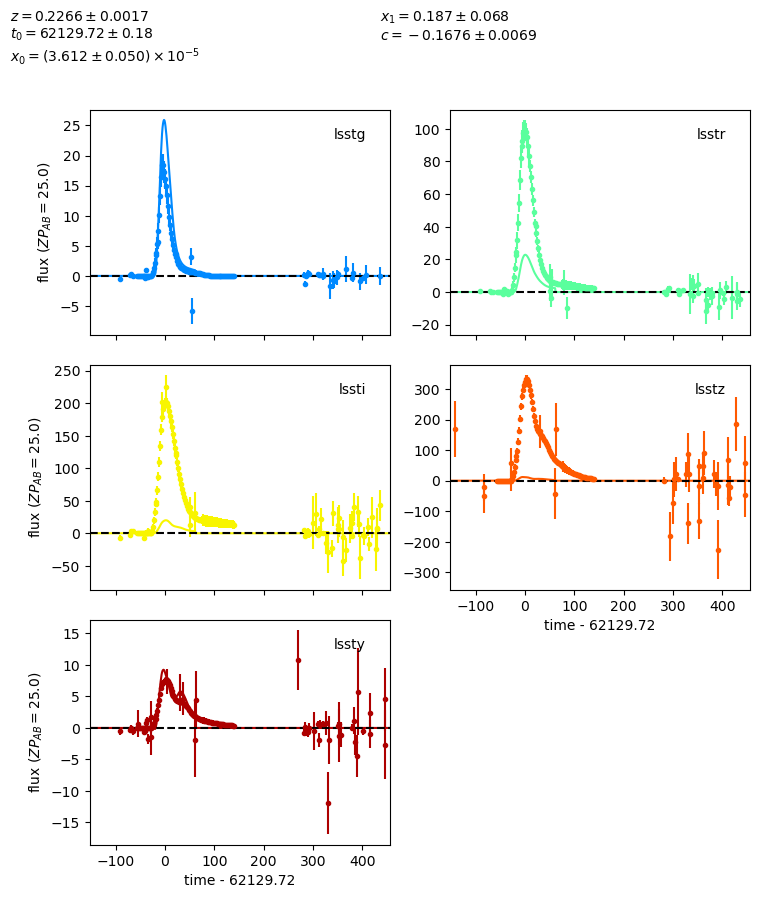

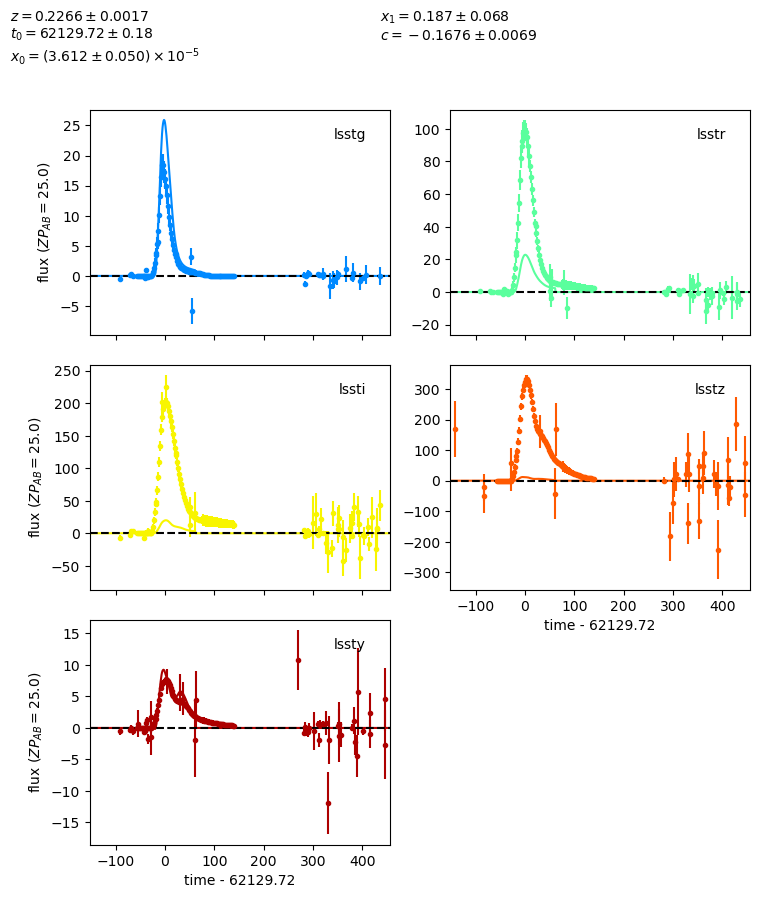

In [20]:
sncosmo.plot_lc(data, model=fitted_model, errors=result.errors, pulls=False)